In [1]:
import pandas as pd
import numpy as np
import random

# Set random seed for reproducibility
np.random.seed(42)

houses = ["Gryffindor", "Slytherin", "Ravenclaw", "Hufflepuff"]

data = []
for i in range(1, 1001):
    bravery = np.random.randint(1, 11)
    cunning = np.random.randint(1, 11)
    intelligence = np.random.randint(1, 11)
    loyalty = np.random.randint(1, 11)
    ambition = np.random.randint(1, 11)
    quirkiness = np.random.randint(1, 11)

    # Random missing values
    if random.random() < 0.1:
        bravery = np.nan
    if random.random() < 0.1:
        cunning = np.nan
    if random.random() < 0.1:
        intelligence = np.nan
    if random.random() < 0.1:
        loyalty = np.nan
    if random.random() < 0.1:
        ambition = np.nan
    if random.random() < 0.1:
        quirkiness = np.nan

    # Assign house based on dominant traits with noise
    if bravery and bravery > 7:
        house = "Gryffindor"
    elif cunning and ambition and (cunning + ambition) > 14:
        house = "Slytherin"
    elif intelligence and intelligence > 7:
        house = "Ravenclaw"
    elif loyalty and loyalty > 7:
        house = "Hufflepuff"
    else:
        house = random.choice(houses)

    data.append([i, bravery, cunning, intelligence, loyalty, ambition, quirkiness, house])

df = pd.DataFrame(data, columns=["StudentID","Bravery","Cunning","Intelligence","Loyalty","Ambition","Quirkiness","House"])

In [2]:
df.head()

,StudentID,Bravery,Cunning,Intelligence,Loyalty,Ambition,Quirkiness,House
0,1,7.0,4.0,8.0,5.0,7.0,10.0,Ravenclaw
1,2,3.0,7.0,8.0,5.0,NaN,8.0,Ravenclaw
2,3,8.0,3.0,6.0,5.0,2.0,8.0,Gryffindor
3,4,6.0,2.0,5.0,1.0,10.0,6.0,Slytherin
4,5,9.0,1.0,10.0,3.0,7.0,NaN,Gryffindor


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   StudentID     1000 non-null   int64  
 1   Bravery       897 non-null    float64
 2   Cunning       915 non-null    float64
 3   Intelligence  910 non-null    float64
 4   Loyalty       888 non-null    float64
 5   Ambition      889 non-null    float64
 6   Quirkiness    894 non-null    float64
 7   House         1000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 62.6+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

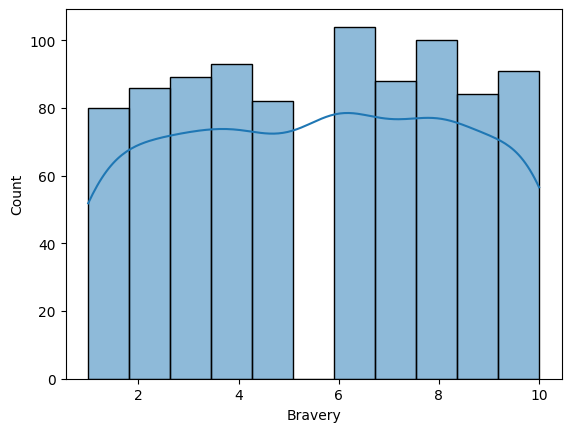

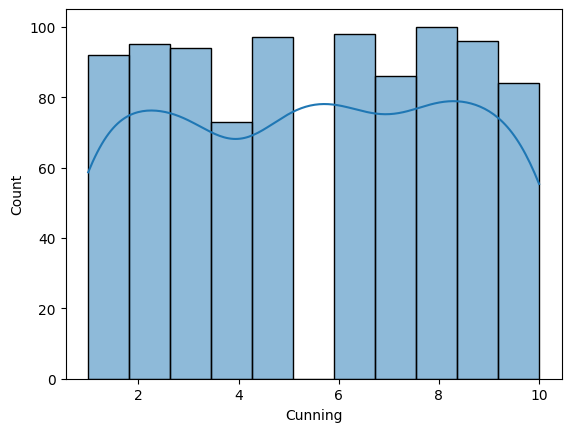

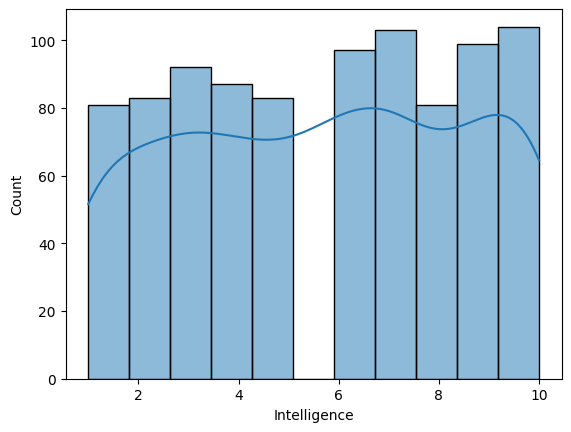

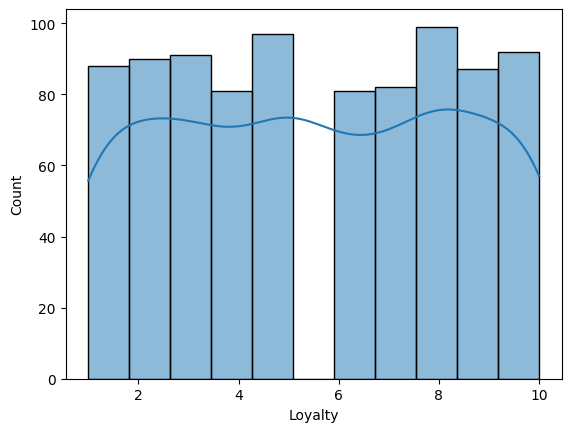

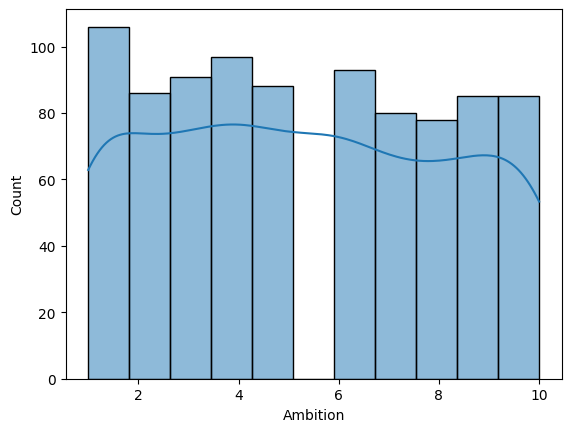

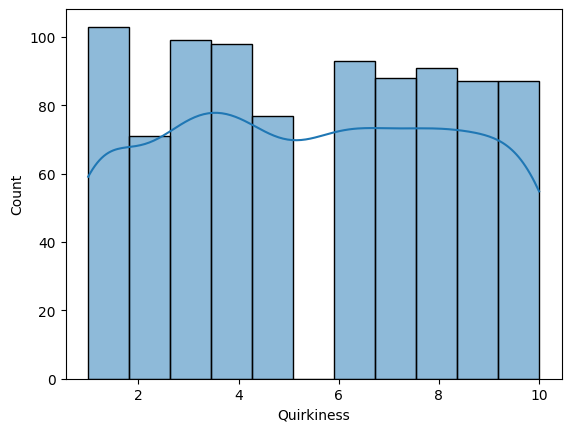

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

float_features = df.select_dtypes(include=['float64'])
for col in float_features.columns:
  sns.histplot(df[col], kde=True)
  plt.show()

In [9]:
df.isnull().sum()

,0
StudentID,0
Bravery,103
Cunning,85
Intelligence,90
Loyalty,112
Ambition,111
Quirkiness,106
House,0


In [11]:
df.fillna(float_features.mean(), inplace = True)

In [14]:
df.isna().sum()

,0
StudentID,0
Bravery,0
Cunning,0
Intelligence,0
Loyalty,0
Ambition,0
Quirkiness,0
House,0


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
df['House'] = le.fit_transform(df['House'])

In [17]:
df.House.value_counts()

,count
House,
0,351
2,240
3,206
1,203


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [29]:
x = df.drop(columns = ['House', 'StudentID'], axis = 1)
y = df['House']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [30]:
model1 = RandomForestClassifier(n_estimators = 100, class_weight = 'balanced', random_state = 42)
model2 = DecisionTreeClassifier(criterion = 'gini', class_weight = 'balanced')
model3 = KNeighborsClassifier()

In [31]:
model1.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [32]:
model2.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [33]:
model3.fit(x_train, y_train)

KNeighborsClassifier()

In [34]:
y_model1 = model1.predict(x_test)
y_model2 = model2.predict(x_test)
y_model3 = model3.predict(x_test)

print('RandomForest')
print(classification_report(y_test, y_model1))
print('DecisionTree')
print(classification_report(y_test, y_model2))
print('KNN')
print(classification_report(y_test, y_model3))

RandomForest
              precision    recall  f1-score   support

           0       0.80      0.81      0.81        70
           1       0.62      0.63      0.63        41
           2       0.79      0.77      0.78        48
           3       0.57      0.56      0.57        41

    accuracy                           0.71       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.71      0.71      0.71       200

DecisionTree
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        70
           1       0.60      0.59      0.59        41
           2       0.76      0.79      0.78        48
           3       0.65      0.59      0.62        41

    accuracy                           0.72       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.72      0.72      0.72       200

KNN
              precision    recall  f1-score   support

           0       0.68      0.74      0.71  

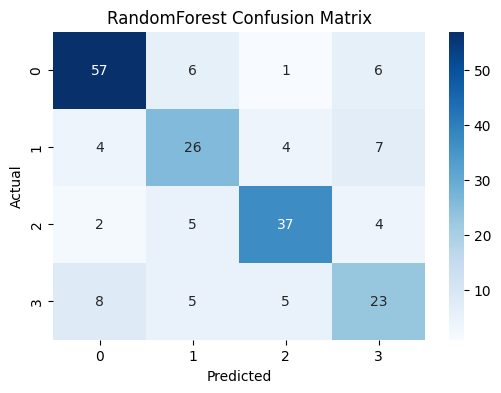

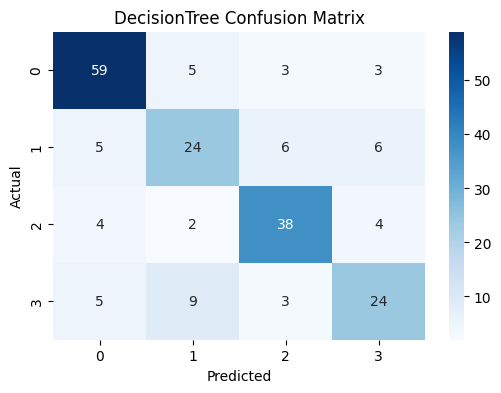

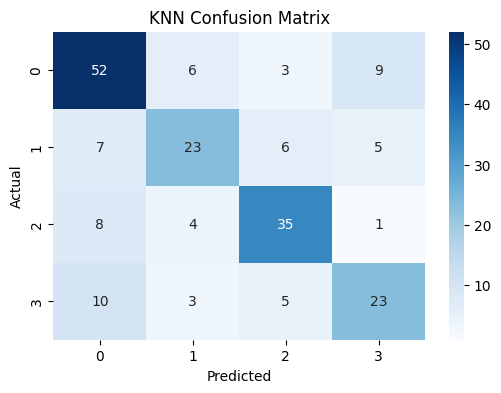

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, y_model1, 'RandomForest Confusion Matrix')
plot_confusion_matrix(y_test, y_model2, 'DecisionTree Confusion Matrix')
plot_confusion_matrix(y_test, y_model3, 'KNN Confusion Matrix')